In [1]:
%%capture --no-stderr
%pip install --quiet -U openai gdown

Downloading...
From: https://drive.google.com/uc?id=1g8ybWMjFVrasbaXPgHG4hD9Er57pL6Cj
To: /Users/shubhamprajapati/Desktop/sahiloan/sahiloan-agent/notebook/basics/image.png
100%|██████████| 173k/173k [00:00<00:00, 928kB/s]


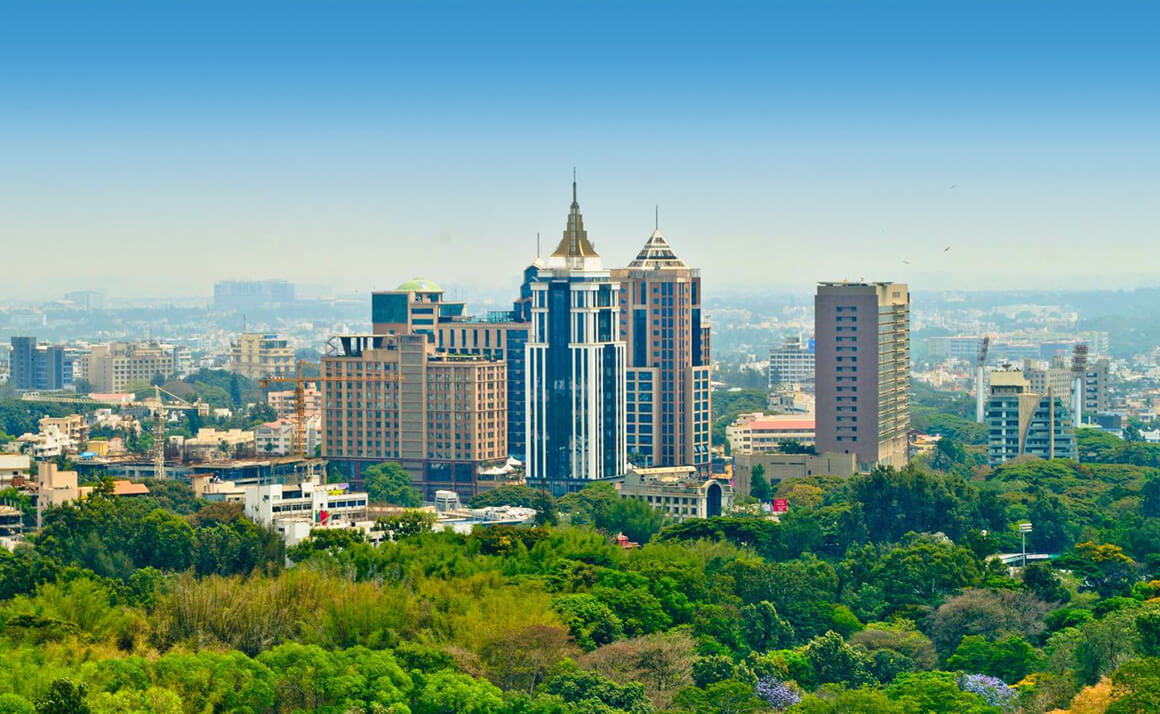

In [2]:
import gdown 

file_id = "1g8ybWMjFVrasbaXPgHG4hD9Er57pL6Cj"
url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(url, output="image.png", quiet=False)
from IPython.display import Image
Image("image.png")


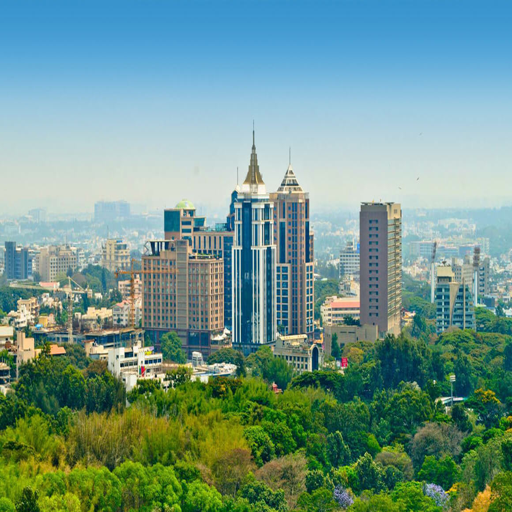

In [4]:
from PIL import Image

# Open and resize the image
img = Image.open("image.png").convert("RGB")
img_resized = img.resize((512, 512))
img_resized

We can't send the images as-is—first, we need to encode them using base64.

In [7]:
import base64
from io import BytesIO 

def encode_image(image: Image.Image) -> str:
    buffered = BytesIO()
    image.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode()

base64_image = encode_image(img_resized)
base64_image

'iVBORw0KGgoAAAANSUhEUgAAAgAAAAIACAIAAAB7GkOtAAEAAElEQVR4nOz9Z7MkWXYgiF3l7iGeyHypKkt2d7XuBhrAYgRmQAzWVszQZkjOcI22/AE024/8xF/Cv0AaP+0ad224Y0vuKAwGqnu6AbSWpbMqdT4VEe5+Be3c63793PDrIiLey8yqegeFrlceV5yrjz707//fv0csGPuPA0aioOqS1NRFUElDiHZ/UcoJoe6jMb4WM/VHVpdEHwmn1R/GmHantsF1vKI4448EV27aV3URalF9gRAZnUePAoj6o0TDqgZCKatrNfOMR+8nktZjDwFPqa/ezD9aR2J8C1pGZo81SxMuX90NWtx2gSjY4Ve1tK42DCHamHrz1JNDPZatFlojQm02eBgK07tewIM2zS5tGkej8MhhEKz6rA1R2m/y5hBpU02a7xEPBKMRnTHfKa5lYvMs6tXBRwPj72s1ZxBvo3ry8UfOqiEFAxlY2ehtEB8+Hkhvm8GlENsw8c0f+2g07G33K7eHK/gYVhdoHSoMDVpQhEmJ+rzE2wZPVMd5j9w2fhhjoNmcQwX6P3Yd2O063QIuo80LxMRvfYr2Fo3da/i6xx97Our6OHLt4jj3nzcgDfwlMrxNSfsKC2+BgVpj2wxu2GZQ7QYMmtRm8tFcR7v0U4J/9R21X5S1Nrvwb/7D4x/OaU8t9OahexNVaZapgxxsmtJoABsco51OXHRxzYU1ZTB6dYHgYwz6Jvzlv202egA6GIOm0XYHEbJ9RFPblRwPG71AlwqsHz10A3btJE/bNiwQJnhjVQYxWT8bcB34NqOzN0inxa7ywQcg+jca6UCtaEfNlAbV+ibK3obtZ6F5F6Jj91d89AGId9XBHsW5gdhTFJ1n/I76r/H1QiOKPCr4+cR3pd+E0TbROMYf5/hdf7kPAEFcOG54/L0X3bGXcYNtBxFMtuMAuua8n2CMvoqDyze+5Hh4SW7/wcmJEPhd38ZT67H

In [8]:
from openai import OpenAI

client = OpenAI()

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "Describe what you see in the picture",
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{base64_image}",
                    },
                },
            ],
        }
    ],
    model="gpt-4o",
)

print(chat_completion.choices[0].message.content)


The image shows a cityscape with a cluster of modern high-rise buildings surrounded by a lush green area. The buildings vary in architectural styles, with one prominent structure featuring a pointed roof. The greenery in the foreground has dense vegetation, contributing to a contrast between nature and urban development. The sky above is clear and blue, suggesting a pleasant day. The city stretches out in the background, indicating it is a sprawling urban area.


In [ ]:
The image shows a cityscape with a cluster of modern high-rise buildings surrounded by a lush green area. The buildings vary in architectural styles, with one prominent structure featuring a pointed roof. The greenery in the foreground has dense vegetation, contributing to a contrast between nature and urban development. The sky above is clear and blue, suggesting a pleasant day. The city stretches out in the background, indicating it is a sprawling urban area.